In [14]:
import laspy 
import numpy as np
import os
from sklearn.neighbors import KDTree

folder_path_5p = r"E:\ALS_DATA\EVO_road_data_NLS_5p\cloud_test1_small_round\5m"
folder_path_20p = r"E:\ALS_DATA\EVO_road_data_NLS_20p\cloud_test1_small_round\5m"

buffer_of_median_z_diff = []
buffer_of_mean_z_diff = []
buffer_of_z_diff = []
middle_points = []

for file in os.listdir(folder_path_20p):
    data_5p = os.path.join(folder_path_5p, file)
    data_20p = os.path.join(folder_path_20p, file)

    points_5p = laspy.read(data_5p)
    points_20p = laspy.read(data_20p)

    xyz_5p = np.vstack((points_5p.x, points_5p.y, points_5p.z)).T
    xyz_20p = np.vstack((points_20p.x, points_20p.y, points_20p.z)).T

    xyz_5p = np.vstack((points_5p.x, points_5p.y, points_5p.z)).T
    predictions_5p = points_5p.prediction

    mask = predictions_5p != 1
    xyz_5p_filtered = xyz_5p[mask]

    xyz_20p = np.vstack((points_20p.x, points_20p.y, points_20p.z)).T
    # predictions_20p = points_20p.prediction

    # mask = predictions_20p != 1
    # xyz_20p_filtered = xyz_20p[mask]

    tree = KDTree(xyz_20p)
    dist, idx = tree.query(xyz_5p_filtered, k=1)

    z_diff =  xyz_20p[idx.flatten(), 2] - xyz_5p_filtered[:, 2]

    buffer_of_z_diff.append(z_diff)
    buffer_of_median_z_diff.append(np.median(z_diff))
    buffer_of_mean_z_diff.append(np.mean(z_diff))

    center_xy = xyz_20p[:, :2].mean(axis=0)
    middle_points.append(center_xy)


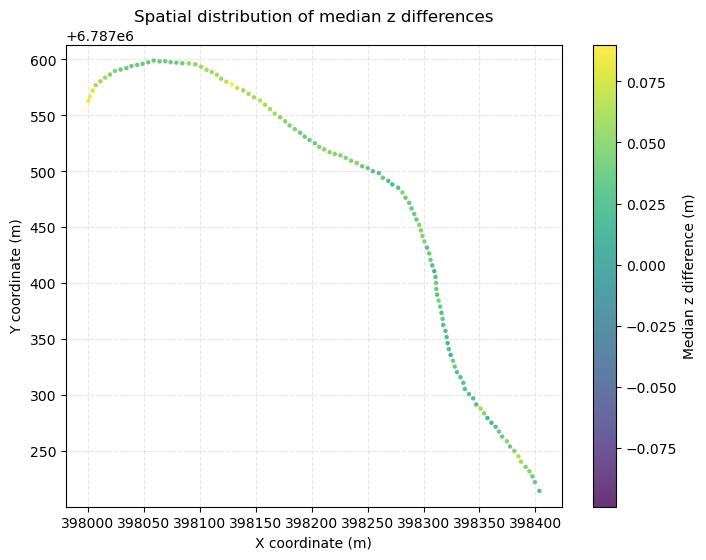

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Example inputs
# xyz_20p: Nx3 array -> columns [x, y, z]
# buffer_of_median_z_diff: list or array of same length as xyz_20p (or one per region)

# Convert to NumPy array if needed
buffer_of_median_z_diff = np.array(buffer_of_median_z_diff)

middle_points_x = [point[0] for point in middle_points]
middle_points_y = [point[1] for point in middle_points]

plt.figure(figsize=(8, 6))
sc = plt.scatter(
    middle_points_x,          # X
    middle_points_y,          # Y
    c=buffer_of_median_z_diff,  # Color by z diff
    cmap='viridis',        # or 'viridis', 'RdBu', etc.
    s=5,                    # marker size
    alpha=0.8,
    vmin=0.09, vmax=-0.09
)

plt.colorbar(sc, label="Median z difference (m)")
plt.title("Spatial distribution of median z differences")
plt.xlabel("X coordinate (m)")
plt.ylabel("Y coordinate (m)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.axis('equal')  # keep aspect ratio true to scale

plt.show()

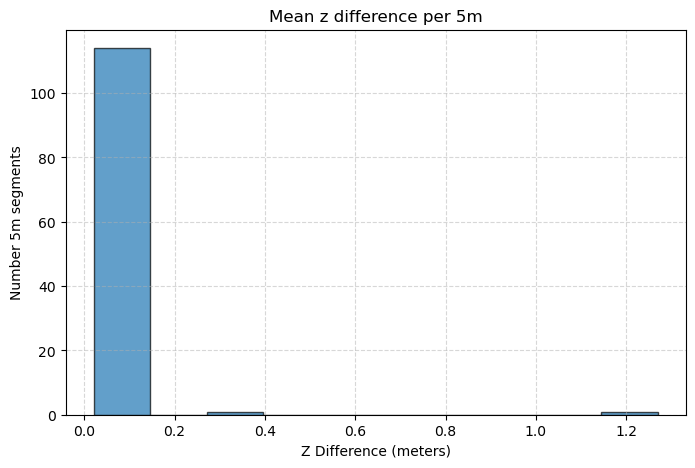

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming z_diff is already computed
plt.figure(figsize=(8, 5))
plt.hist(buffer_of_mean_z_diff, bins=10, edgecolor='black', alpha=0.7)

plt.title("Mean z difference per 5m")
plt.xlabel("Z Difference (meters)")
plt.ylabel("Number 5m segments")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

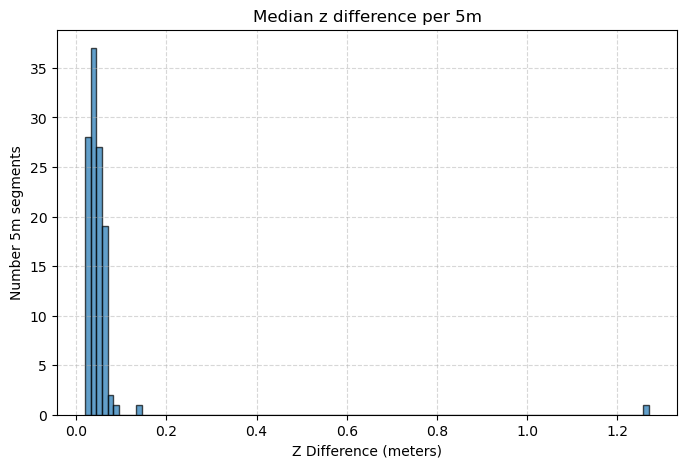

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming z_diff is already computed
plt.figure(figsize=(8, 5))
plt.hist(buffer_of_median_z_diff, bins=100, edgecolor='black', alpha=0.7)

plt.title("Median z difference per 5m")
plt.xlabel("Z Difference (meters)")
plt.ylabel("Number 5m segments")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

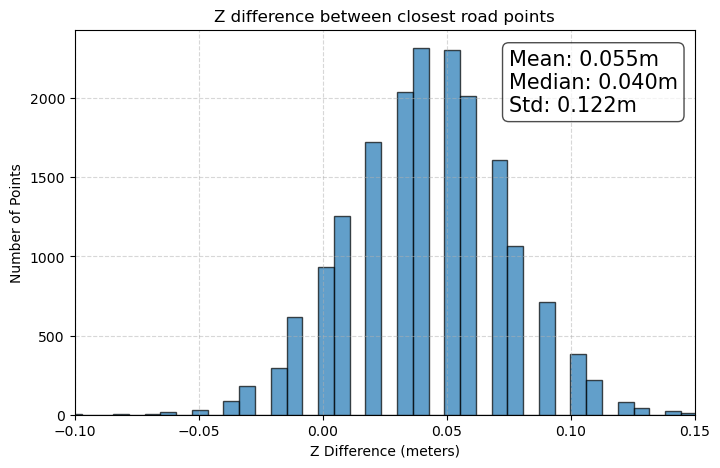

In [20]:
import matplotlib.pyplot as plt
import numpy as np

z_diff = [item for sublist in buffer_of_z_diff for item in sublist]

# Assuming z_diff is already computed
mean_val = np.mean(z_diff)
median_val = np.median(z_diff)
std_val = np.std(z_diff)


# Add statistics text in the top-left corner
stats_text = f"Mean: {mean_val:.3f}m\nMedian: {median_val:.3f}m\nStd: {std_val:.3f}m"

# Assuming z_diff is already computed
plt.figure(figsize=(8, 5))
plt.hist(z_diff, bins=250, edgecolor='black', alpha=0.7)

plt.text(
    0.70, 0.95, stats_text,
    transform=plt.gca().transAxes,  # position relative to axes
    fontsize=15,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

plt.title("Z difference between closest road points")
plt.xlabel("Z Difference (meters)")
plt.ylabel("Number of Points")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(-0.10, 0.15)

plt.show()